## Импорт библиотек

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [3]:
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

## EDA

### Описание данных
#### user_data:
client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст


#### logs:
client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unix

In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
user_data.shape

(2954, 3)

In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [7]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [8]:
logs.shape

(4500, 4)

In [9]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


## Задачи

#### Сколько уникальных значений в переменной platform?

In [10]:
logs.platform.nunique()

3

#### Какой клиент совершил больше всего успешных операций?

In [11]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [12]:
success_number = (logs.query('success == True')
 .groupby('client', as_index=False)
 .agg({'platform': 'count'})
 .rename(columns={'platform': 'success_number'})
 .sort_values(by='success_number', ascending=False))

In [13]:
success_number
# Клиенты совершившие успешные операции в порядке убывания

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [14]:
successful_clients = (success_number.query('success_number == 41')
                      .sort_values('client')
                      .client
                      .tolist())

In [15]:
successful_clients
# Список клиентов совершивших больше всего успешных операций

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [16]:
str_successful_clients = ', '.join([str(client) for client in successful_clients])

In [17]:
str_successful_clients
# Строка клиентов совершивших больше всего успешных операций

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

#### С какой платформы было совершено наибольшее количество успешных операций?

In [18]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [19]:
(logs.query('success == True')
 .platform.value_counts())

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [20]:
logs.loc[logs.success == True].platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

#### Какая платформа наиболее популярна среди премиумных клиентов?

In [21]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [22]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [23]:
data = user_data.merge(logs, on='client')

In [24]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [25]:
(data.query('premium == True')
 .platform
 .value_counts())

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [26]:
(data.query('premium == True')
 .platform
 .value_counts()
 .idxmax())

'phone'

In [27]:
(data.query('premium == True')
 .value_counts('platform'))

platform
phone       246
computer    150
tablet       24
dtype: int64

#### Визуализировать распределение возраста клиентов от типа клиентов (премиум или нет)

In [28]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


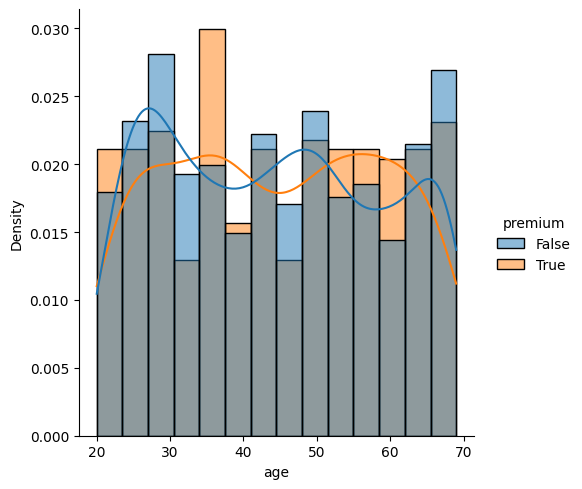

In [29]:
sns.displot(data=data, x='age', hue='premium', kde=True, stat='density', common_norm=False, bins=14);
# common_norm=False - считаем каждое распределение ОТДЕЛЬНЫМ распределением

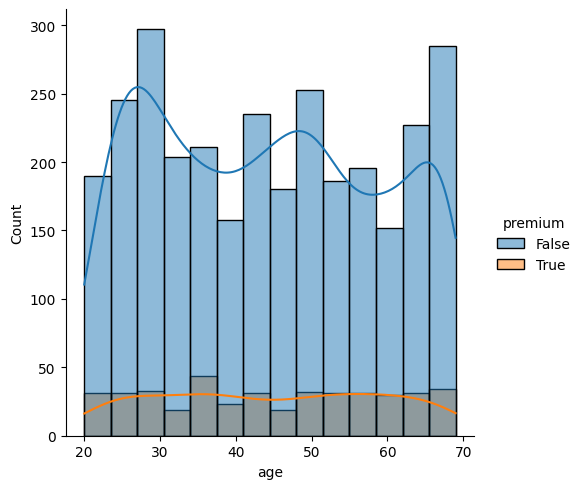

In [48]:
sns.displot(data=data, x='age', hue='premium', kde=True, bins=14);
# Распределение клиентов по типам: ПРЕМИУМ и НЕ ПРЕМИУМ

#### Постройте график распределения числа успешных операций

In [31]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [32]:
data.shape

(3439, 6)

In [33]:
success_count = logs.query('success == True').client.value_counts()

In [34]:
success_count

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: client, Length: 2845, dtype: int64

In [45]:
success_count = success_count.rename('Successes')

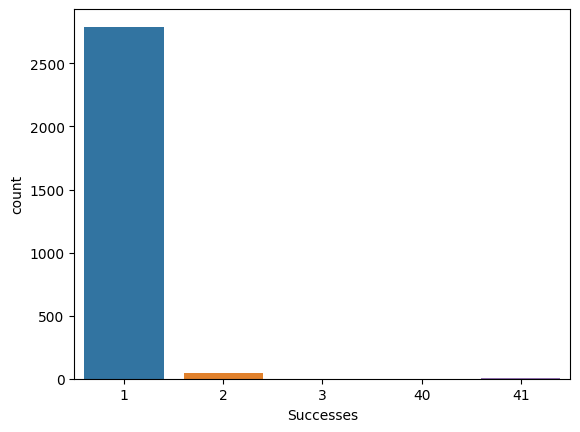

In [47]:
sns.countplot(x=success_count);
# График распределения числа успешных операций

#### Визуализировать число успешных операций на платформе ***computer***

In [82]:
success_count_pc = data.query('success == True and platform == "computer"')
# Создание ДФ, где только УСПЕШНЫЕ операции и тип платформы - ПК

In [76]:
success_count_pc

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


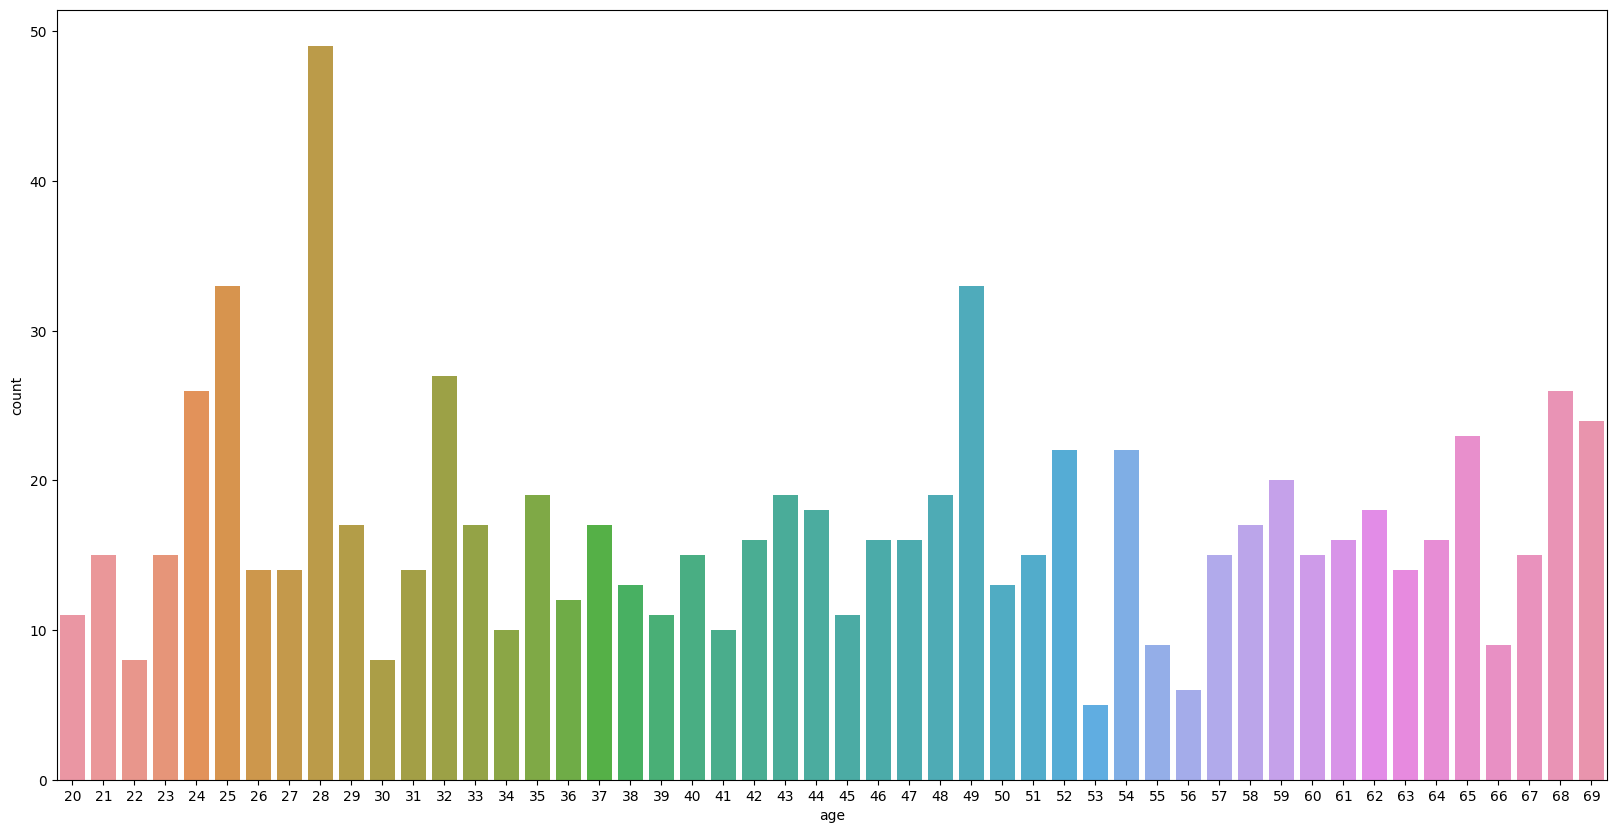

In [81]:
plt.figure(figsize=(20, 10))
sns.countplot(data=success_count_pc, x='age');
# График распределения числа успешных операций

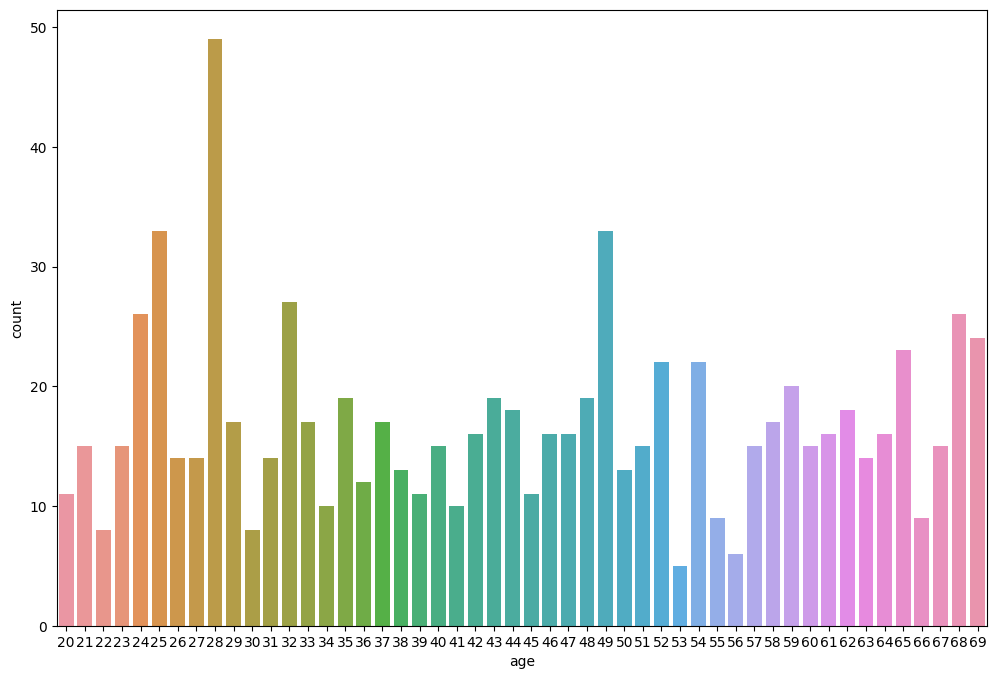

In [78]:
plt.figure(figsize=(12, 8));
sns.countplot(data=data.loc[(data.platform == 'computer') & (data.success == True)], x='age');

### Вопрос:
#### Клиенты какого возраста совершили наибольшее количество успешных действий?

#### Ответ: 28